<a href="https://colab.research.google.com/github/arminnorouzi/computer_vision_workshop/blob/main/L01_Convolutional_neural_networks_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L01 Convolutional Neural Networks and Computer Vision with TensorFlow
   - Developed by **Armin Norouzi**
   - Compatible with Google Colaboratory- Tensorflow 2.8.2

   
   - **Objective:** Develop CNN models using Tensorflow
   
   
**Table of content:**

- Binary Classification of Images
- Multi-class classification of Images


## Geting data and being familiar with data

### Get the data

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes. 

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://gitlab.com/arminny/ml_course_datasets/-/raw/main/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-07 14:32:30--  https://gitlab.com/arminny/ml_course_datasets/-/raw/main/pizza_steak.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/octet-stream]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   126MB/s    in 0.8s    

2022-10-07 14:32:31 (126 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data

* A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

Let's inspect each of the directories we've downloaded.

To so do, we can use the command `ls` which stands for list.

In [ ]:
!ls pizza_steak

test  train


We can see we've got a `train` and `test` folder.

Let's see what's inside one of them.

In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 384, 3)


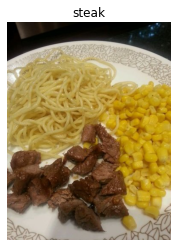

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (287, 512, 3)


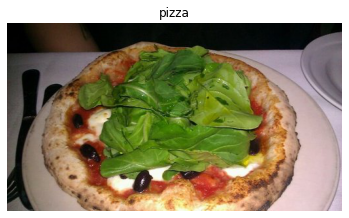

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(287, 512, 3)

In [ ]:
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   7],
        [  3,   2,   7],
        [  3,   2,   7]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   7],
        [  3,   2,   7],
        [  3,   2,   7]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   2,   4],
        [  2,   1,   6],
        [  2,   1,   6]],

       ...,

       [[ 92,  85,  79],
        [ 90,  83,  77],
        [ 90,  83,  77],
        ...,
        [203, 182, 199],
        [206, 185, 202],
        [203, 182, 199]],

       [[ 87,  82,  76],
        [ 82,  77,  71],
        [ 82,  77,  71],
        ...,
        [204, 183, 200],
        [207, 186, 203],
        [204, 183, 200]],

       [[ 88,  85,  78],
        [ 87,  84,  77],
        [ 87,  84,  77],
        ...,
        [203, 182, 199],
        [205, 184, 201],
        [202, 181, 198]]

Looking at the image shape more closely, you'll see it's in the form `(Width, Height, Colour Channels)`.

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of [red, green and blue (RGB) pixels](https://en.wikipedia.org/wiki/RGB_color_model).

You'll notice all of the values in the `img` array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we build a model to differentiate between our images of `pizza` and `steak`, it will be finding patterns in these different pixel values which determine what each class looks like.


### A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Flatteen layer | Unrol the value of pooling or conv layer | [`tf.keras.layers.Flatten`] |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) (for multi-class classification)|

- [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/).

**Conv Layer**

![](https://www.mdpi.com/sustainability/sustainability-13-01224/article_deploy/html/images/sustainability-13-01224-g001.png)


**Pooling Layer**

![img](https://www.researchgate.net/profile/Imran-Ali-12/publication/340812216/figure/fig4/AS:928590380138496@1598404607456/Pooling-layer-operation-oproaches-1-Pooling-layers-For-the-function-of-decreasing-the_W640.jpg)

**Flatten Layer**

![img](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

## Binary Classification of Images

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes. 

It's time to jump straight in the deep end.

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> **Note:** A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

> **Resource:** The architecture we're using below is a scaled-down version of [VGG-16](https://arxiv.org/abs/1505.06798), a convolutional neural network which came 2nd in the 2014 [ImageNet classification competition](http://image-net.org/).

### Importing libraries


Keras image data generator is used for the generation of the batches containing the data of tensor images and is used in the domain of real-time data augmentation.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Preprosessing

In [ ]:
# Set the seed
tf.random.set_seed(42)


# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Model structure

![img](https://gitlab.com/arminny/ml_course_datasets/-/raw/main/tinyVGG.PNG)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

def model_structure():
  model = Sequential()
  model.add(Conv2D(10, 3, strides=1, activation="relu",input_shape=(224, 224, 3), name='conv1', padding="same"))
  model.add(Conv2D(10, 3, activation="relu", name='conv2', padding="same"))
  model.add(MaxPool2D(2, name='MaxPool1')) # padding can also be 'same'
  model.add(Conv2D(10, 3, activation="relu", name='conv3', padding="same"))
  model.add(MaxPool2D(2, name='MaxPool2'))
  model.add(Conv2D(10, 3, activation="relu", name='conv4', padding="same"))
  model.add(MaxPool2D(2, name='MaxPool3'))
  model.add(Flatten(name='Flatten'))
  model.add(Dense(1, activation="sigmoid", name='Output'))

  # Compile the model
  model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
  print(model.summary())
  return model



### Hyper-parameters explaination

[source](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7)


Here we will speak about the additional parameters present in CNNs, please refer part-I(link at the start) to learn about hyper-parameters in dense layers as they also are part of the CNN architecture.

- Kernel/Filter Size: A filter is a matrix of weights with which we convolve on the input. The filter on convolution, provides a measure for how close a patch of input resembles a feature. A feature may be vertical edge or an arch,or any shape. The weights in the filter matrix are derived while training the data. Smaller filters collect as much local information as possible, bigger filters represent more global, high-level and representative information. If you think that a big amount of pixels are necessary for the network to recognize the object you will use large filters (as 11x11 or 9x9). If you think what differentiates objects are some small and local features you should use small filters (3x3 or 5x5). Note in general we use filters with odd sizes.
Padding: Padding is generally used to add columns and rows of zeroes to keep the spatial sizes constant after convolution, doing this might improve performance as it retains the information at the borders. Parameters for the padding function in Keras are Same- output size is the same as input size by padding evenly left and right, but if the amount of columns to be added is odd, it will add the extra column to the right.Valid- Output size shrinks to ceil((n+f-1)/s) where ’n’ is input dimensions ‘f’ is filter size and ‘s’ is stride length. ceil rounds off the decimal to the closet higher integer, No padding occurs.

- Stride: It is generally the number of pixels you wish to skip while traversing the input horizontally and vertically during convolution after each element-wise multiplication of the input weights with those in the filter. It is used to decrease the input image size considerably as after the convolution operation the size shrinks to ceil((n+f-1)/s) where ’n’ is input dimensions ‘f’ is filter size and ‘s’ is stride length. ceil rounds off the decimal to the closet higher integer.


- Number of Channels: It is the equal to the number of color channels for the input but in later stages is equal to the number of filters we use for the convolution operation. The more the number of channels,more the number of filters used, more are the features learnt, and more is the chances to over-fit and vice-versa.


- Pooling-layer Parameters: Pooling layers too have the same parameters as a convolution layer. Max-Pooling is generally used among all the pooling options. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality by keeping the max value(activated features) in the sub-regions binned.

### Principles/Conventions to build a CNN architecture

The basic principle followed in building a convolutional neural network is to **‘keep the feature space wide and shallow in the initial stages of the network, and the make it narrower and deeper towards the end.’**


Keeping the above principle in mind we lay down a few conventions to be followed to guide you while building your CNN architecture

1. Always start by using smaller filters is to collect as much local information as possible, and then gradually increase the filter width to reduce the generated feature space width to represent more global, high-level and representative information

2. Following the principle, the number of channels should be low in the beginning such that it detects low-level features which are combined to form many complex shapes(by increasing the number of channels) which help distinguish between classes.

    The number of filters is increased to increase the depth of the feature space thus helping in learning more levels of global abstract structures. One more utility of making the feature space deeper and narrower is to shrink the feature space for input to the dense networks.

    By convention the number of channels generally increase or stay the same while we progress through layers in our convolutional neural net architecture

3. General filter sizes used are 3x3, 5x5 and 7x7 for the convolutional layer for a moderate or small-sized images and for Max-Pooling parameters we use 2x2 or 3x3 filter sizes with a stride of 2. Larger filter sizes and strides may be used to shrink a large image to a moderate size and then go further with the convention stated.

4. Try using padding = same when you feel the border’s of the image might be important or just to help elongate your network architecture as padding keeps the dimensions same even after the convolution operation and therefore you can perform more convolutions without shrinking size.

5. Keep adding layers until you over-fit. As once we achieved a considerable accuracy in our validation set we can use regularization components like l1/l2 regularization, dropout, batch norm, data augmentation etc. to reduce over-fitting

5. Always use classic networks like LeNet, AlexNet, VGG-16, VGG-19 etc. as an inspiration while building the architectures for your models. By inspiration i mean follow the trend used in the architectures for example trend in the layers Conv-Pool-Conv-Pool or Conv-Conv-Pool-Conv-Conv-Pool or trend in the Number of channels 32–64–128 or 32–32-64–64 or trend in filter sizes, Max-pooling parameters etc.

### Training

In [ ]:
model_1 = model_structure()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 224, 224, 10)      280       
                                                                 
 conv2 (Conv2D)              (None, 224, 224, 10)      910       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 112, 112, 10)      0         
                                                                 
 conv3 (Conv2D)              (None, 112, 112, 10)      910       
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 56, 56, 10)        0         
                                                                 
 conv4 (Conv2D)              (None, 56, 56, 10)        910       
                                                                 
 MaxPool3 (MaxPooling2D)     (None, 28, 28, 10)        0

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose = 1)

Epoch 1/5
47/47 [==============================] - 22s 207ms/step - loss: 0.6291 - accuracy: 0.6740 - val_loss: 0.4298 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4454 - accuracy: 0.8053 - val_loss: 0.3838 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4328 - accuracy: 0.8020 - val_loss: 0.3485 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3883 - accuracy: 0.8320 - val_loss: 0.3366 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3839 - accuracy: 0.8307 - val_loss: 0.3200 - val_accuracy: 0.8840


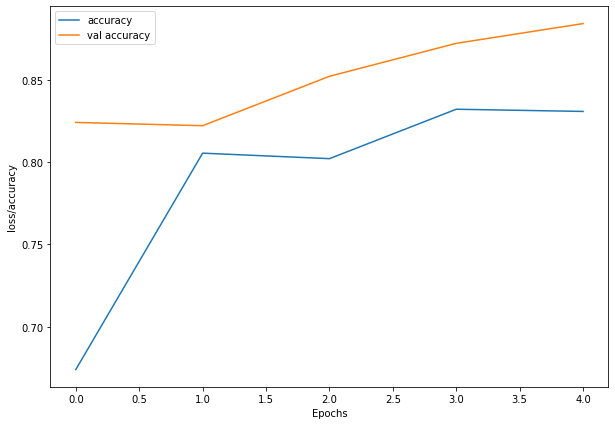

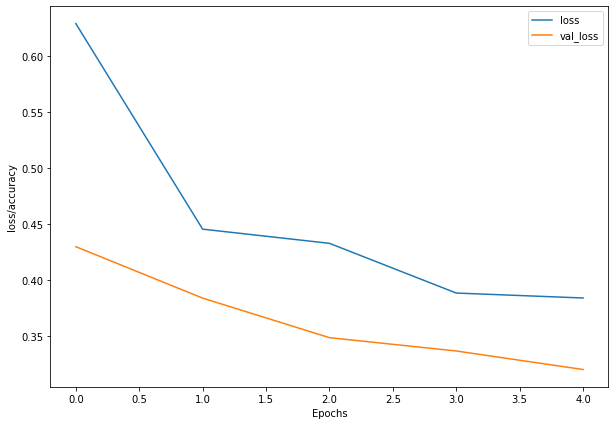

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure(figsize=(10, 7))
  plt.plot(history.history['accuracy'], label = "accuracy")
  plt.plot(history.history['val_accuracy'], label= "val accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("loss/accuracy")
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 7))
  plt.plot(history.history['loss'], label = "loss")
  plt.plot(history.history['val_loss'], label= "val_loss")
  plt.xlabel("Epochs")
  plt.ylabel("loss/accuracy")
  plt.legend()
  plt.show()

plot_history(history_1)

In [ ]:
# Fit the model
history_2 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose = 1)

Epoch 1/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3568 - accuracy: 0.8480 - val_loss: 0.3065 - val_accuracy: 0.8780
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3374 - accuracy: 0.8520 - val_loss: 0.2974 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3325 - accuracy: 0.8533 - val_loss: 0.3176 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3242 - accuracy: 0.8613 - val_loss: 0.2660 - val_accuracy: 0.8920
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.2802 - accuracy: 0.8893 - val_loss: 0.2690 - val_accuracy: 0.8920


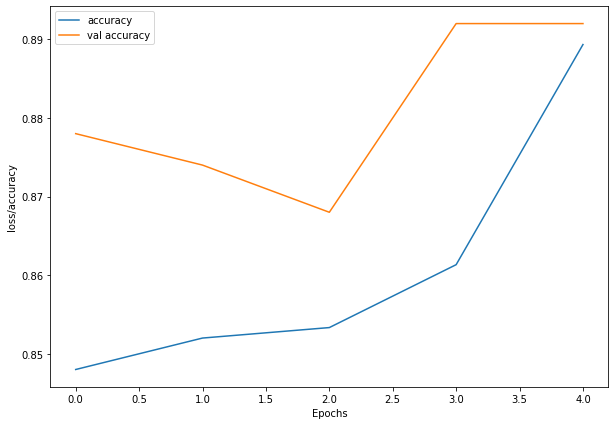

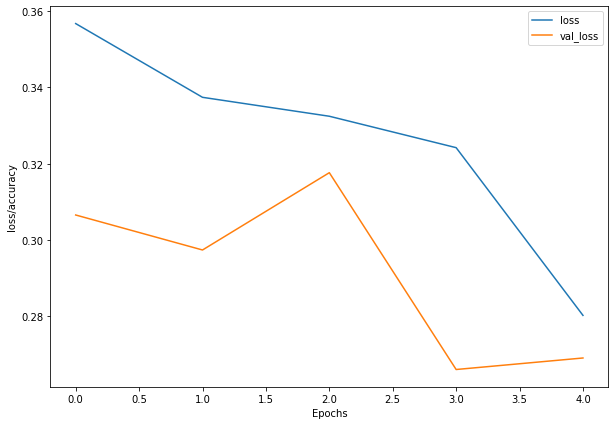

In [ ]:
plot_history(history_2)

In [ ]:

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()


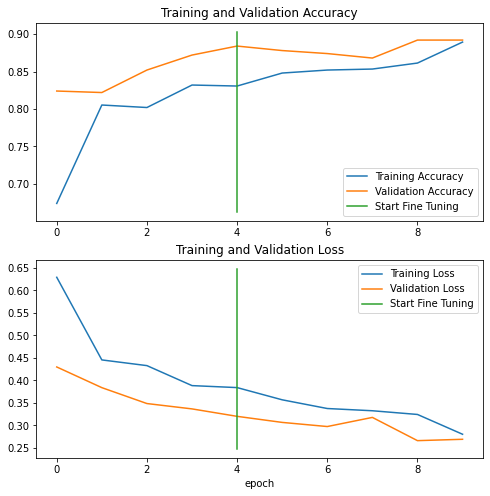

In [ ]:
compare_historys(history_1, history_2, initial_epochs=5)

## Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

How about we go through those steps again, except this time, we'll work with 10 different types of food.

1. Check data
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied



### 1. Import and checking data

Again, we've got a subset of the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101). In addition to the pizza and steak images, we've pulled out another eight classes.


In [ ]:
def unzip_data(filename):
  """
  Unzips filename into the current working directory.
  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

# Download zip file of 10_food_classes images
!wget https://gitlab.com/arminny/ml_course_datasets/-/raw/main/10_food_classes_all_data.zip

# Unzip the downloaded file
unzip_data("10_food_classes_all_data.zip")

--2022-10-07 14:39:43--  https://gitlab.com/arminny/ml_course_datasets/-/raw/main/10_food_classes_all_data.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/octet-stream]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.8MB/s    in 17s     

2022-10-07 14:40:01 (29.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now let's check out all of the different directories and sub-directories in the `10_food_classes` file.

In [ ]:
import os


def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

We'll now setup the training and test directory paths.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And get the class names from the subdirectories.

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


How about we visualize an image from the training set?

Image shape: (512, 512, 3)


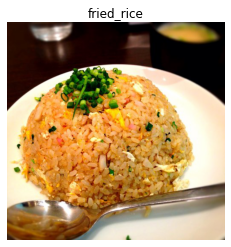

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### 2. Preprocess the data (prepare it for a model)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the `class_mode` parameter to `'categorical'` because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.


### 3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:
* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.

In [ ]:
def model_structure_multi_class():
  model = Sequential()
  model.add(Conv2D(10, 3, strides=1, activation="relu",input_shape=(224, 224, 3), name='conv1', padding="same"))
  model.add(Conv2D(10, 3, activation="relu", name='conv2', padding="same"))
  model.add(MaxPool2D(2, name='MaxPool1')) # padding can also be 'same'
  model.add(Conv2D(10, 3, activation="relu", name='conv3', padding="same"))
  model.add(MaxPool2D(2, name='MaxPool2'))
  model.add(Conv2D(10, 3, activation="relu", name='conv4', padding="same"))
  model.add(MaxPool2D(2, name='MaxPool3'))
  model.add(Flatten(name='Flatten'))
  model.add(Dense(10, activation="softmax", name='Output'))

  # Compile the model
  model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
  print(model.summary())
  return model


In [ ]:
model_multi_class = model_structure_multi_class()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 224, 224, 10)      280       
                                                                 
 conv2 (Conv2D)              (None, 224, 224, 10)      910       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 112, 112, 10)      0         
                                                                 
 conv3 (Conv2D)              (None, 112, 112, 10)      910       
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 56, 56, 10)        0         
                                                                 
 conv4 (Conv2D)              (None, 56, 56, 10)        910       
                                                                 
 MaxPool3 (MaxPooling2D)     (None, 28, 28, 10)       

### 4. Fit a model

Now we've got a model suited for working with multiple classes, let's fit it to our data.

In [ ]:
# Fit the model
history_3 = model_multi_class.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 192ms/step - loss: 2.1262 - accuracy: 0.2195 - val_loss: 1.9664 - val_accuracy: 0.2948
Epoch 2/5
235/235 [==============================] - 46s 195ms/step - loss: 1.8815 - accuracy: 0.3495 - val_loss: 1.8664 - val_accuracy: 0.3352
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.6819 - accuracy: 0.4263 - val_loss: 1.7910 - val_accuracy: 0.3756
Epoch 4/5
235/235 [==============================] - 44s 189ms/step - loss: 1.4550 - accuracy: 0.5103 - val_loss: 1.8269 - val_accuracy: 0.3724
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 1.2014 - accuracy: 0.5916 - val_loss: 1.9928 - val_accuracy: 0.3636


### 5. Evaluate the model

Woohoo! We've just trained a model on 10 different classes of food images, let's see how it went.

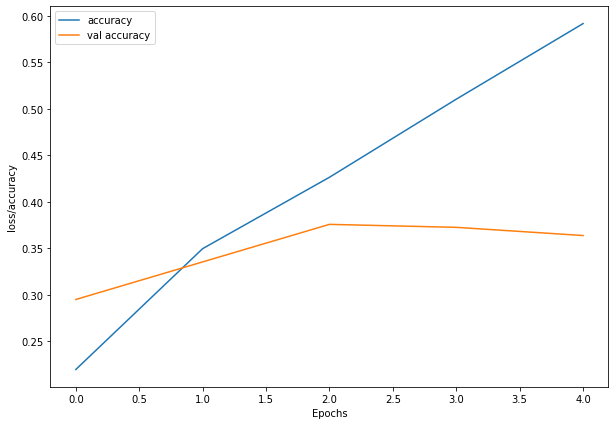

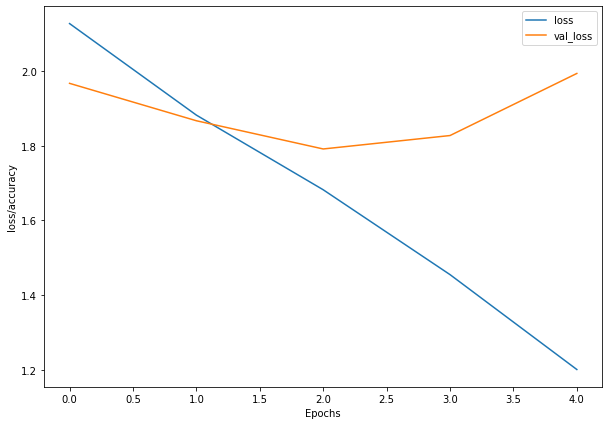

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_history(history_3)

In [ ]:
# Fit the model
history_4 = model_multi_class.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 0.9400 - accuracy: 0.6868 - val_loss: 2.3092 - val_accuracy: 0.3344
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 0.6735 - accuracy: 0.7805 - val_loss: 2.6009 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 0.4766 - accuracy: 0.8468 - val_loss: 3.4548 - val_accuracy: 0.3000
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 0.3015 - accuracy: 0.9073 - val_loss: 4.0260 - val_accuracy: 0.3068
Epoch 5/5
235/235 [==============================] - 44s 189ms/step - loss: 0.2031 - accuracy: 0.9365 - val_loss: 4.8728 - val_accuracy: 0.2876


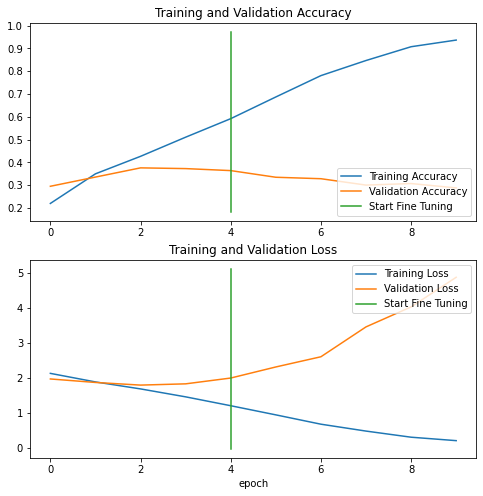

In [ ]:
compare_historys(history_3, history_4, initial_epochs=5)

### 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

### Making a prediction with our trained model

What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [ ]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Beautiful, now let's get some of our custom images.

If you're using Google Colab, you could also upload some of your own images via the files tab.

In [ ]:
# -q is for "quiet"
!wget -q https://gitlab.com/arminny/ml_course_datasets/-/raw/main/03-steak.jpeg
!wget -q https://gitlab.com/arminny/ml_course_datasets/-/raw/main/03-hamburger.jpeg
!wget -q https://gitlab.com/arminny/ml_course_datasets/-/raw/main/03-sushi.jpeg

Okay, we've got some custom images to try, let's use the `pred_and_plot` function to make a prediction with `model_11` on one of the images and plot it.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


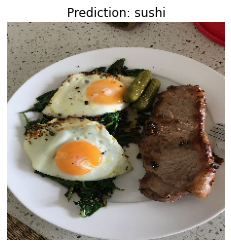

In [ ]:
# Make a prediction using model_5
pred_and_plot(model=model_multi_class, 
              filename="03-steak.jpeg", 
              class_names=class_names)

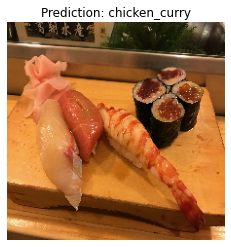

In [ ]:
pred_and_plot(model_multi_class, "03-sushi.jpeg", class_names)

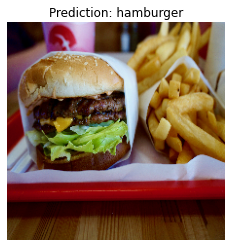

In [ ]:
pred_and_plot(model_multi_class, "03-hamburger.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

## Reference

[1] [Neural Network Regression with TensorFlow](https://dev.mrdbourke.com/tensorflow-deep-learning/01_neural_network_regression_in_tensorflow/)


[2] [Neural Network Classification with TensorFlow](https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/)


[3] [Milestone Project 3: Time series forecasting in TensorFlow](https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/)

[4] [Tensorflow Documentation for Python](https://www.tensorflow.org/)

